In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('train.csv')

In [102]:
#check data
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [103]:
# Average fuel_cost_per_unit_burned based on fuel_type_code_pudl
df.groupby('fuel_type_code_pudl').fuel_cost_per_unit_burned.mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [104]:
#check standard deviation and 75% percentile of fuel_mmbtu_per_unit
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [105]:
#check skewness of fuel_qty_burned
df['fuel_qty_burned'].skew()

15.851495469109503

In [106]:
#check kurtosis of fuel_qty_burned
df['fuel_qty_burned'].kurt()

651.3694501337732

In [107]:
#Calculate sum of missing values
df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [108]:
#calculate percentage of missing value
df.fuel_unit.isna().sum() / len(df)

0.00609694136774718

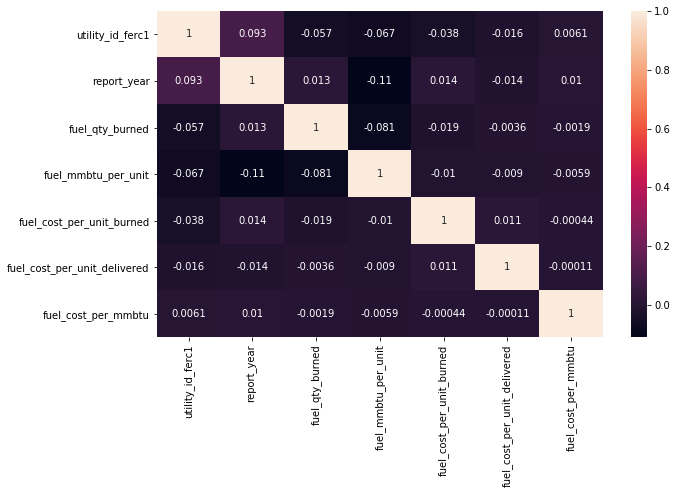

In [109]:
#View correlation distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6 ))
sns.heatmap(df.corr(), annot=True);

In [172]:
#percentage in fuel_cost_per_unit_burned from 1994 to 1998
df1 = df[df.fuel_type_code_pudl == 'coal']

df2 = df1.fuel_cost_per_unit_burned[df1.report_year == 1994].sum()
df3 = df1.fuel_cost_per_unit_burned[df1.report_year == 1998].sum()
df4 = df1.fuel_cost_per_unit_burned.sum()

(df2/df4 * 100) - (df3/df4 * 100)

In [138]:
#highest average based on report_year
df.groupby('report_year').fuel_cost_per_unit_delivered.mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64